## ThinkStats 9.1 - 9.3 Companion

This notebook will allow you to practice some of the concepts from ThinkStats2 Chapter 9.

### Companion to 9.1 - 9.2

First, we'll start with the question that Allen poses at the beginning of the chapter: "Suppose we toss a coin 250 times and we see 140 heads.  Is this strong evidence that the coin is biased?"

As Allen says, classical hypothesis testing is similar to a proof by contradiction.  First, we assume that the thing we are trying to show is false (that the coin is biased).  Second, we show that this leads to an observed event being excedingly improbable (seeing 140 heads out of 250 tosses).  Finally, we can conclude that our assumption (that the coin is not biased) is unlikely to be true.

Write a function to simulate n random coin flips of a fair coin (p(heads) = 0.5).  Your function should return the number of heads that occur in those n coin clips.

In [2]:
from random import choice

def simulate_fair_coin_flips(n):
    """ Return the number of heads that occur in n flips of a
        fair coin p(heads) = 0.5 """
    count = 0
    for _ in range(n):
        if choice('HT') == 'H':
            count += 1
    return count

print simulate_fair_coin_flips(250)

137


Next, repeat your simulation of 240 coin flips 1000 times.  Create and display a CDF of the number of times heads appears based on  1000 random trials.

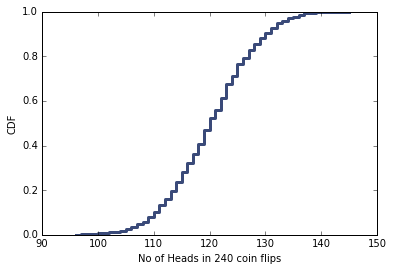

In [17]:
%matplotlib inline
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

# your implementation here (imports included for convenience)
res = []
for _ in range(1000):
    res.append(simulate_fair_coin_flips(240))

cdf = thinkstats2.Cdf(res)
thinkplot.Cdf(cdf)
thinkplot.show(xlabel='No of Heads in 240 coin flips', ylabel='CDF')

The p-value is simply the probability that we would have seen a result as extreme (or greater) as 140 heads out of 250 flips under the hypothesis that the coin is fair (the null hypothesis).  Using the CDF you created in the previous cell, compute the p-value.  If you want to test your learning a bit more: compute the p-value without using the CDF explicitly (instead use the results of the 1000 random trials directly).

Hint: you should use the PercentileRank function of CDF to compute the p-value, however, there is one important gotcha.  The PercentileRank function returns the percentage of data that is equal to or less than the input value.  When computing the p-value we want the percentage of the data that is equal to or greater than the observed value.

In [18]:
print "p-value:", float(format(100 - cdf.PercentileRank(139), '.2f'))

p-value: 0.4


The p-value we computed above is called a [one-tailed test](https://en.wikipedia.org/wiki/One-_and_two-tailed_tests) in that we only counted simulations of the null-hypothesis that had 140 or more heads (Allen uses the terminology of one versus two-sided tests, see ThinkStats2 9.4).  A two-tailed test would count simulations with 140 or more tails as well (which is what Allen shows in the book).  Whether to use a one-tailed or a two-tailed test mostly has to do with your prior expectations regarding the hypothesis you are testing.  For instance, if you had a reason to suspect that the coin would be biased towards heads (but not tails) you would use a one-tailed test.  If you had no reason to assume a priori that the coin was biased towards heads or tails, you should use a two-tailed test.

Modify your coin flip simulation code to return the number of heads or tails, whichever is larger, out of n flips.

In [20]:
def simulate_fair_coin_flips_two_sided(n):
    """ Return the number of heads or tails, whichever is larger,
        that occur in n flips of a fair coin p(heads) = 0.5 """
    count_heads = 0
    count_tails = 0
    for _ in range(n):
        if choice('HT') == 'H':
            count_heads += 1
        else:
            count_tails += 1
    return max(count_heads, count_tails)

print simulate_fair_coin_flips_two_sided(250)

125


Using the function `simulate_fair_coin_flips_two_sided`, create and display a CDF of the number of times the most common outcome, heads or tails, appears based on 1000 random trials.

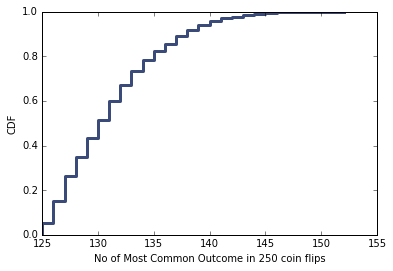

In [23]:
res = []
for _ in range(1000):
    res.append(simulate_fair_coin_flips_two_sided(250))

cdf = thinkstats2.Cdf(res)
thinkplot.Cdf(cdf)
thinkplot.show(xlabel='No of Most Common Outcome in 250 coin flips', ylabel='CDF')

Use the CDF to compute a two-tailed (or two-sided) p-value for the observed data (140 heads out of 250 flips).

In [24]:
print "p-value:", float(format(100 - cdf.PercentileRank(139), '.2f'))

p-value: 5.8


This approach (via simulations of the null-hypothesis) to computing p-values has its limitations.  For instance, suppose you observed 180 heads in 250 flips.  If you used your CDF from above to answer this question, what would go wrong?  What would you need to do in order to get a sensible estimate of this p-value?

Using the same cdf, if we compute the percentile rank of 180, we get 100% which means that our calculation of the p-value would be 0. The reason is because in our 1000 trials, we don't have any trials where the most common outcome exceeds 155. You would need to increase the number of trials in order to get a percentile rank of 180 that might not be 100% because you need trials where you actually flipped heads 180 times out of the 250.

### Companion to 9.3

In Section 9.3 Allen uses a permutation test to examine whether there is a significant difference between the pregnancy lengths for first babies versus others.  Here, I will ask you to implement a very similar test without using the base class `thinkstats2.HypothesisTest`.  This will be the second test you have implemented on your own.  From here on out, you may implement tests by inheriting from `thinkstats2.HypothesisTest`, or you can choose to simply roll your own.

We will test the hypothesis that the mean age of men versus women on the titanic was different.  First, let's load the data and drop any rows where age is missing.

In [25]:
import pandas as pd

data = pd.read_csv('../datasets/titanic_train.csv')
data = data.dropna(subset=['Age'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Write a function that takes as input a data frame and computes the absolute value of the difference in mean age between men and women.

In [26]:
def compute_age_diff(data):
    """ Compute the absolute value of the difference in mean age
        between men and women on the titanic """
    men_only = data[data.Sex == 'male']
    women_only = data[data.Sex == 'female']
    return abs(men_only.Age.mean() - women_only.Age.mean())

observed_age_diff = compute_age_diff(data)
print "observed age difference", observed_age_diff

observed age difference 2.81093577935


Write a function called `shuffle_ages` that returns a copy of the original data frame but where the Ages have been randomly permuted.

Hint: there are lots of ways to do this, but  `numpy.random.permutation` seems to be an especially succint choice.  Make sure to try this function out on a small, hand-made Pandas series to get the idea of how it works.

In [27]:
from numpy.random import permutation

def shuffle_ages(data):
    """ Return a new dataframe (don't modify the original) where
        the values in the Age column have been randomly permuted. """
    res = data
    res.Age = permutation(res.Age).astype(int)
    return res

compute_age_diff(shuffle_ages(data))

2.649336479663038

Using 1000 random simulations, compute the p-value for the hypothesis that the mean ages of men and women were different (you may wish to use Cdf as in the previous section).

In [30]:
res = []
for _ in range(1000):
    res.append(compute_age_diff(shuffle_ages(data)))

cdf = thinkstats2.Cdf(res)
print "p-value:", float(format(100 - cdf.PercentileRank(observed_age_diff), '.2f'))

p-value: 0.6


Ignoring passengers with missing ages:

1.  Was the average age of male versus female passengers on the titanic different?
2.  What additional (if any) conclusions can you draw based on the p-value you just computed?  In other words, what does this p-value mean?

Disclaimer: (1) is a bit of a trick question (sorry!), but I included it to encourage being precise about the definition of the null hypothesis and eactly which population it refers to.

The average age of male versus female passengers on the Titanic was different. Since the p-value we calculated was around 1%, we know that the difference in average age between genders is statistically significant because we tested our null hypothesis by shuffling the ages and the percentage of the shuffled data that is equal to or greater than our observed value is under 1%, which means that this effect is not due to chance. So it follows that the average ages of men vs women on the titanic was actually different, not just due to chance.